In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plot / Graph stuffs
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.metrics as metrics #import confusion_matrix, classification_report

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../data_root/raw"]).decode("utf8"))

wine_dataset.csv



In [2]:
input_csv = '../data_root/raw/wine_dataset.csv'
init_data = pd.read_csv(input_csv, index_col= 0)

print("Number of rows before processing:", len(init_data))
print()
print("Summary of numerical columns: ")
print(init_data.describe())
print()
print("Summary of missing data: ")
print(init_data.isna().sum())
print()
print("Sample data: ")
init_data.head()


Number of rows before processing: 10000

Summary of numerical columns: 
             points        price
count  10000.000000  9323.000000
mean      88.460000    35.447603
std        3.030003    40.898626
min       80.000000     5.000000
25%       86.000000    17.000000
50%       88.000000    25.000000
75%       91.000000    42.000000
max      100.000000  1300.000000

Summary of missing data: 
country                     6
description                 0
designation              2829
points                      0
price                     677
province                    6
region_1                 1664
region_2                 6147
taster_name              1985
taster_twitter_handle    2356
title                       0
variety                     0
winery                      0
dtype: int64

Sample data: 


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


In [3]:
selected_data = init_data[['country', 'description', 'points', 'price', 
    'province', 'title', 'variety','winery']]

deduped_data = selected_data[~selected_data.duplicated()]
print("Number of rows after removing duplicates:",
      len(deduped_data))

data = deduped_data.dropna()
print("Number of rows after removing missing data:" , len(data))

Number of rows after removing duplicates: 9942
Number of rows after removing missing data: 9261


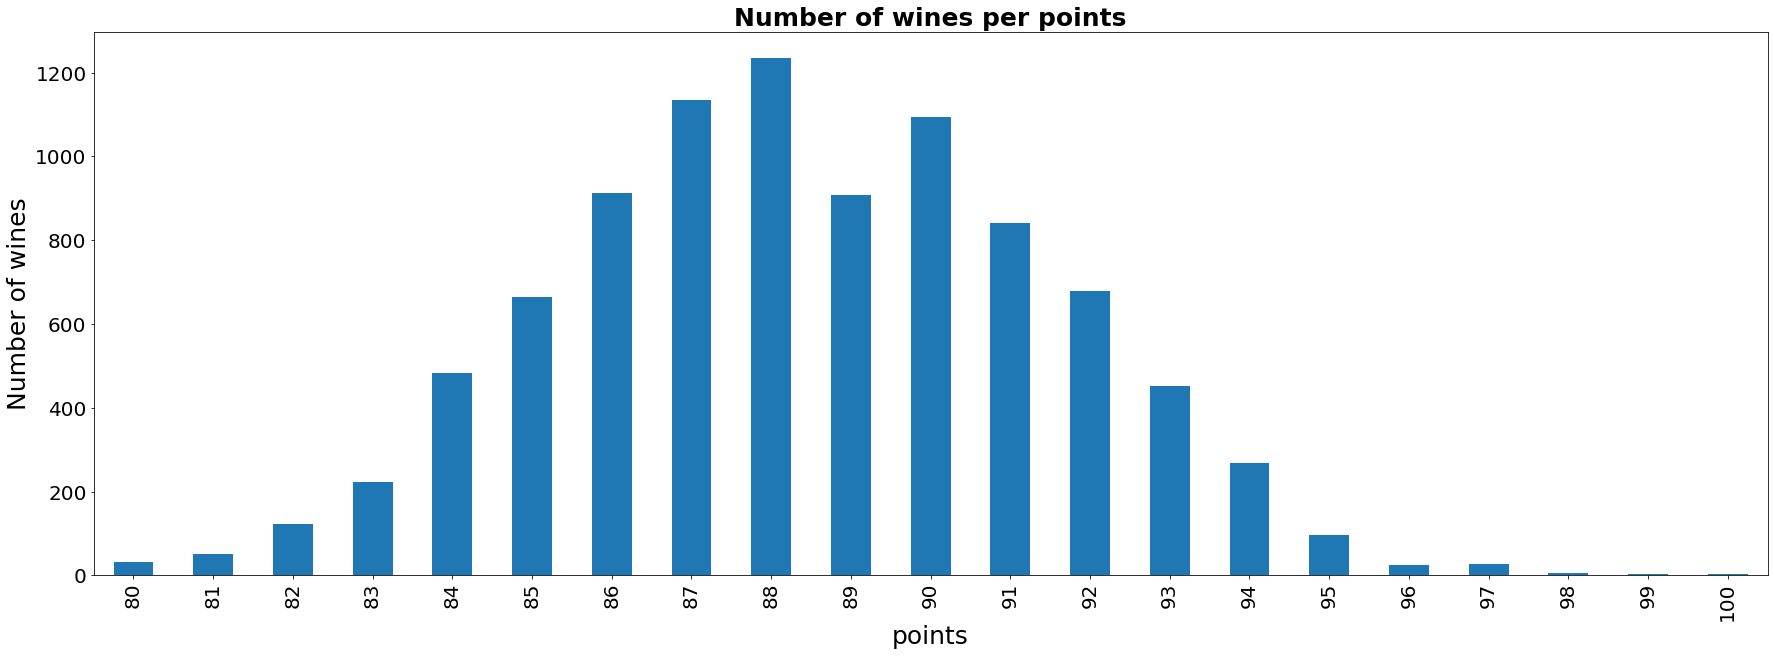

In [4]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
data.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')

In [5]:
data.describe()

,points,price
count,9261.000000,9261.000000
mean,88.439909,35.466472
std,3.041822,40.988869
min,80.000000,5.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,1300.000000


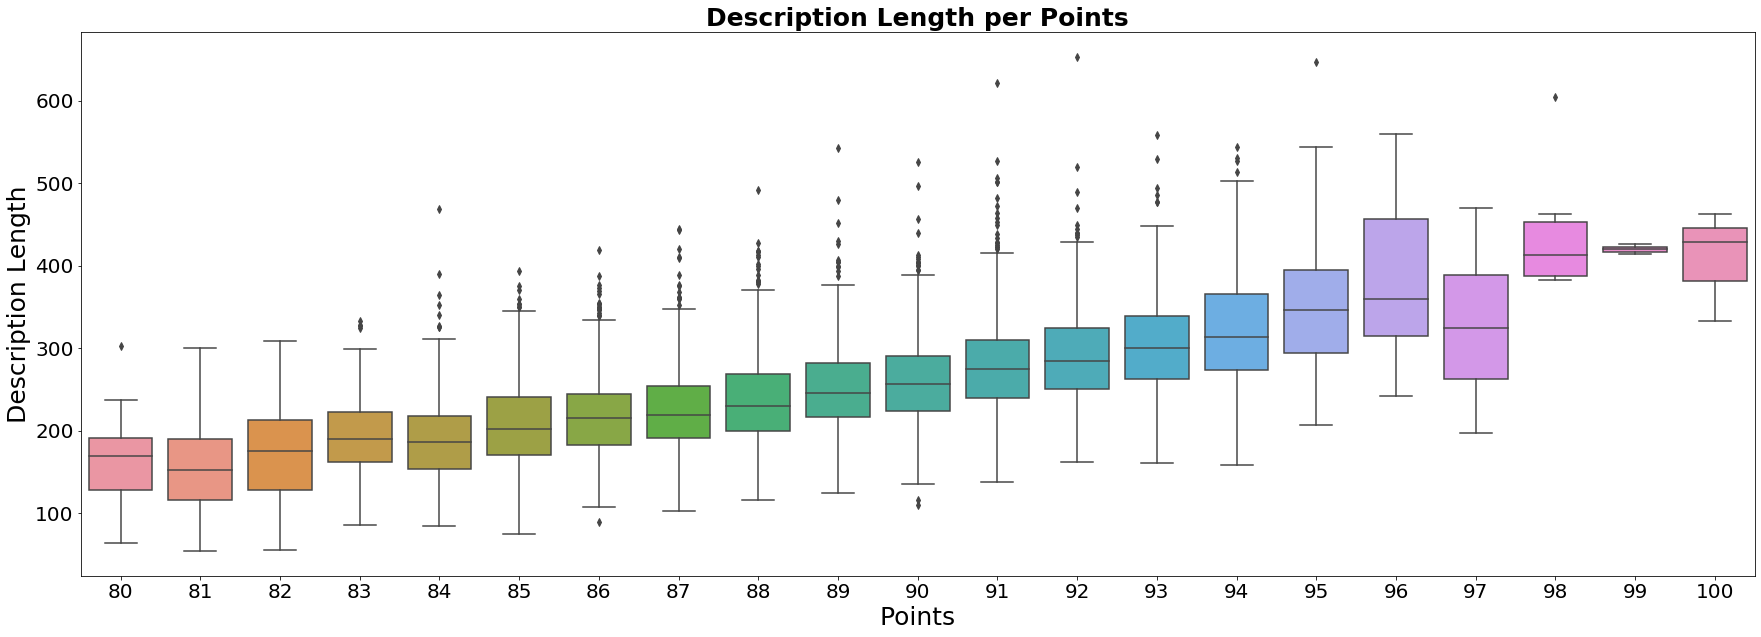

In [6]:
data = data.assign(description_length = data['description'].apply(len))

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [7]:
#Transform method taking points as param
def transform_points_simplified(points):
    if points < 86:
        return 1
    elif points >= 86 and points < 88:
        return 2 
    elif points >= 88 and points < 91:
        return 3 
    elif points >= 91:
        return 4 
    else:
        return 0

#Applying transform method and assigning result to new column "points_simplified"
data = data.assign(points_simplified = data['points'].apply(transform_points_simplified))

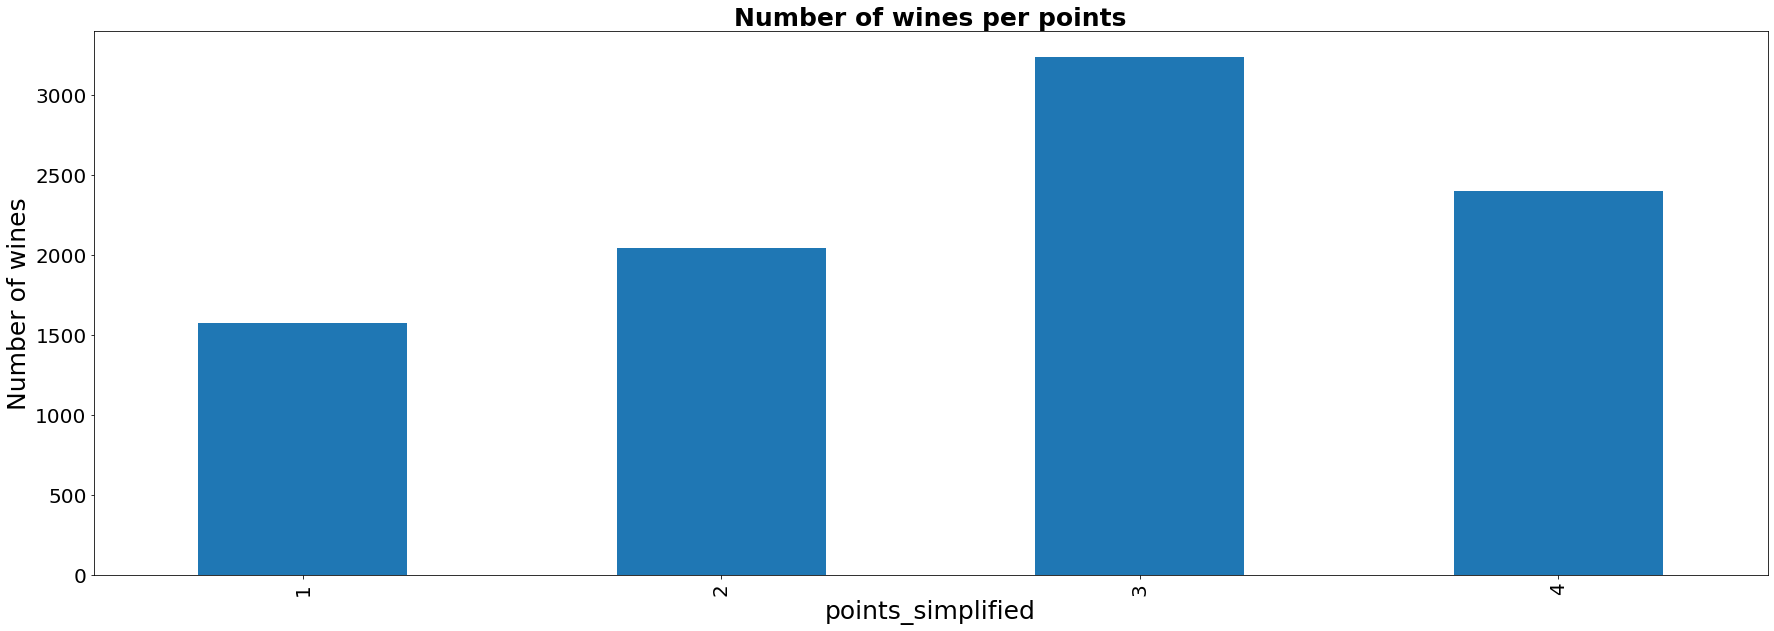

In [8]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Number of wines per points', fontweight="bold", size=25) # Title
ax.set_ylabel('Number of wines', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
data.groupby(['points_simplified']).count()['description'].plot(ax=ax, kind='bar')

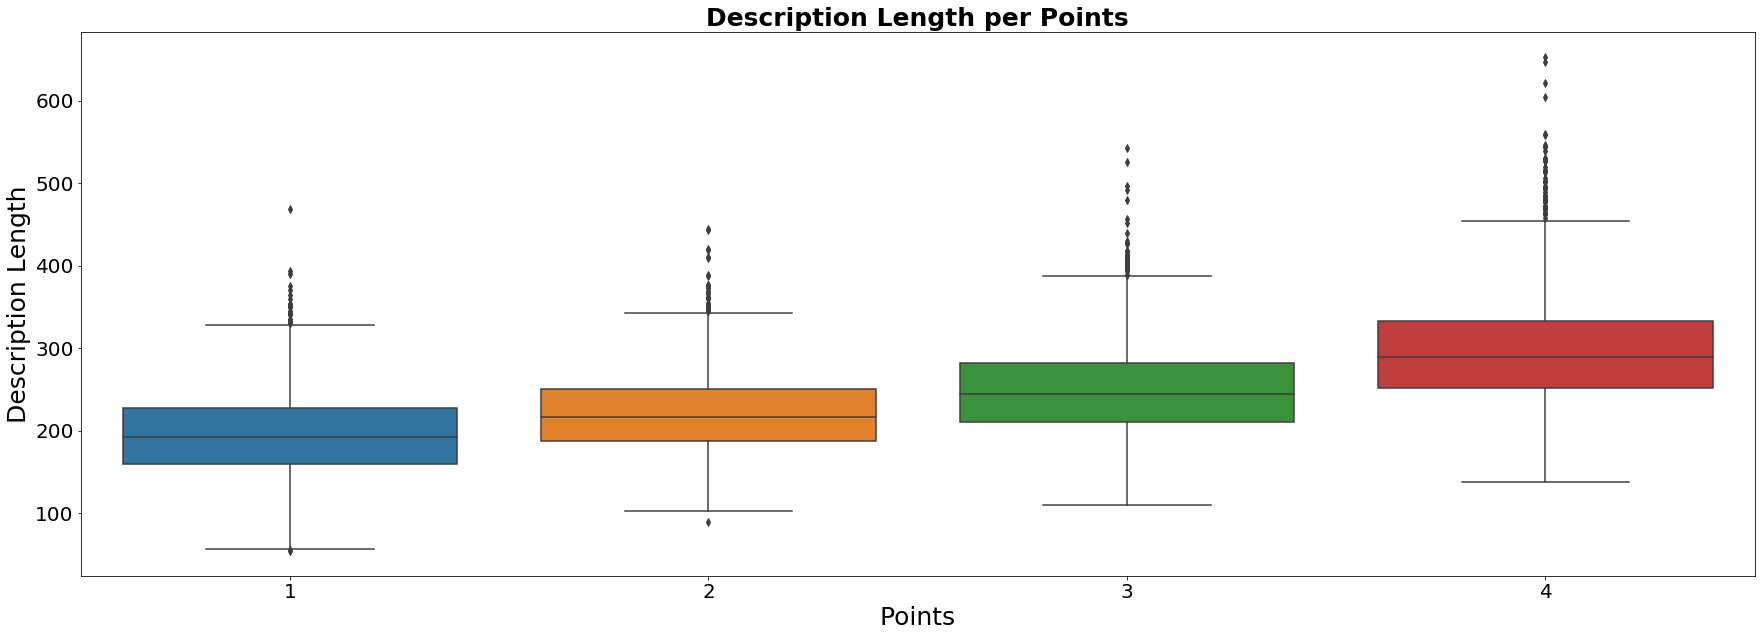

In [9]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points_simplified', y='description_length', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.show()

In [10]:
cat_features = [
    'country',
    'province',
    'variety',
    'winery',
]

num_features = [
    'price',
    'description_length'
]

labels = ['points']


In [11]:
X_num = data[num_features]
y = data[labels]


# Training model
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    X_num, y, test_size=0.1, random_state=101
)

rfr_num = RandomForestRegressor()
rfr_num.fit(X_num_train, y_num_train)

# Testing model
predictions_num = rfr_num.predict(X_num_test)

/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [12]:
print("Results of random regressor on price and description length only:" )
print("explained_variance_score: ", metrics.explained_variance_score(y_num_test, predictions_num)) #Explained variance regression score function
print("max_error: ", metrics.max_error(y_num_test, predictions_num)) #max_error metric calculates the maximum residual error.
print("mean absolute error: ", metrics.mean_absolute_error(y_num_test, predictions_num)) #Mean absolute error regression loss
print("mean squared error: ", metrics.mean_squared_error(y_num_test, predictions_num)) #Mean squared error regression loss
print("mean squared log error: ", metrics.mean_squared_log_error(y_num_test, predictions_num)) #Mean squared logarithmic error regression loss
print("median absolute error: ", metrics.median_absolute_error(y_num_test, predictions_num)) #Median absolute error regression loss
print("R2 score: ", metrics.r2_score(y_num_test, predictions_num)) #R^2 (coefficient of determination) regression score function.


Results of random regressor on price and description length only:
explained_variance_score:  0.4002551353364723
max_error:  7.106666666666669
mean absolute error:  1.867157793063942
mean squared error:  5.3978233921707535
mean squared log error:  0.000677969769794121
median absolute error:  1.5999999999999943
R2 score:  0.40024533498284043


In [13]:
X_cat = data[cat_features]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_cat)
X_cat_tfm = enc.transform(X_cat).toarray()
X_cat_tfm = X_cat_tfm[:, np.where(np.sum(X_cat_tfm, axis=0) > 10)[0]]

# Training model
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat_tfm, y, test_size=0.1, random_state=101)
rfr_cat = RandomForestRegressor()
rfr_cat.fit(X_cat_train, y_cat_train)

# Testing model
predictions_cat = rfr_cat.predict(X_cat_test)

/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [14]:
print("Results of random regressor on", ", ".join(cat_features), "only:" )
print("explained_variance_score: ", metrics.explained_variance_score(y_cat_test, predictions_cat)) #Explained variance regression score function
print("max_error: ", metrics.max_error(y_cat_test, predictions_cat)) #max_error metric calculates the maximum residual error.
print("mean absolute error: ", metrics.mean_absolute_error(y_cat_test, predictions_cat)) #Mean absolute error regression loss
print("mean squared error: ", metrics.mean_squared_error(y_cat_test, predictions_cat)) #Mean squared error regression loss
print("mean squared log error: ", metrics.mean_squared_log_error(y_cat_test, predictions_cat)) #Mean squared logarithmic error regression loss
print("median absolute error: ", metrics.median_absolute_error(y_cat_test, predictions_cat)) #Median absolute error regression loss
print("R2 score: ", metrics.r2_score(y_cat_test, predictions_cat)) #R^2 (coefficient of determination) regression score function.


Results of random regressor on country, province, variety, winery only:
explained_variance_score:  0.09889063430094303
max_error:  9.169062298421153
mean absolute error:  2.298447933246309
mean squared error:  8.110125902183208
mean squared log error:  0.0010137188911255623
median absolute error:  2.009592302005373
R2 score:  0.09888014291724168


In [15]:
from scipy.sparse import hstack

X_all = hstack([X_cat_tfm,X_num])

# Training model
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.1, random_state=101)
rfr_all = RandomForestRegressor()
rfr_all.fit(X_all_train, y_all_train)

# Testing model
predictions_all = rfr_all.predict(X_all_test)

/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/philip/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [16]:
print("Results of random regressor on all features except description:" )
print("explained_variance_score: ", metrics.explained_variance_score(y_all_test, predictions_all)) #Explained variance regression score function
print("max_error: ", metrics.max_error(y_all_test, predictions_all)) #max_error metric calculates the maximum residual error.
print("mean absolute error: ", metrics.mean_absolute_error(y_all_test, predictions_all)) #Mean absolute error regression loss
print("mean squared error: ", metrics.mean_squared_error(y_all_test, predictions_cat)) #Mean squared error regression loss
print("mean squared log error: ", metrics.mean_squared_log_error(y_all_test, predictions_all)) #Mean squared logarithmic error regression loss
print("median absolute error: ", metrics.median_absolute_error(y_all_test, predictions_all)) #Median absolute error regression loss
print("R2 score: ", metrics.r2_score(y_all_test, predictions_all)) #R^2 (coefficient of determination) regression score function.

Results of random regressor on all features except description:
explained_variance_score:  0.4858940159486701
max_error:  7.900000000000006
mean absolute error:  1.706530025170802
mean squared error:  8.110125902183208
mean squared log error:  0.0005800330536527675
median absolute error:  1.4000000000000057
R2 score:  0.4858923090569103


In [17]:
#X = data['description']
#y = data['points']

#vectorizer = CountVectorizer()
#vectorizer.fit(X)

In [18]:
#X = vectorizer.transform(X)
#print('Shape of Sparse Matrix: ', X.shape)
#print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
#density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
#print('Density: {}'.format((density)))

In [19]:
# Training the model
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
#rfc = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=2,
                            max_features="sqrt")
#rfc.fit(X_train, y_train)

# Testing the model
#predictions = rfc.predict(X_test)

IndentationError: unexpected indent (<ipython-input-19-710d18ad9525>, line 4)

In [ ]:
#print("explained_variance_score: ", metrics.explained_variance_score(y_test, predictions)) #Explained variance regression score function
#print("max_error: ", metrics.max_error(y_test, predictions)) #max_error metric calculates the maximum residual error.
#print("mean absolute error: ", metrics.mean_absolute_error(y_test, predictions)) #Mean absolute error regression loss
#print("mean squared error: ", metrics.mean_squared_error(y_test, predictions)) #Mean squared error regression loss
#print("mean squared log error: ", metrics.mean_squared_log_error(y_test, predictions)) #Mean squared logarithmic error regression loss
#print("median absolute error: ", metrics.median_absolute_error(y_test, predictions)) #Median absolute error regression loss
#print("R2 score: ", metrics.r2_score(y_test, predictions)) #R^2 (coefficient of determination) regression score function.


In [ ]:
#X = data['description']
#y = data['points_simplified']

# Vectorizing model
#vectorizer = TfidfVectorizer()
#vectorizer.fit(X)
#X = vectorizer.transform(X)

In [ ]:
# Training model
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)

# Testing model
#predictions = rfc.predict(X_test)
#print(classification_report(y_test, predictions))